In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [2]:
# reading csv file
df=pd.read_csv('iris.csv')
df

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 5)

# Cleaning of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal length   150 non-null    float64
 1   sepal width    150 non-null    float64
 2   petal length   150 non-null    float64
 3   petal width    150 non-null    float64
 4   Class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum().sum()

0

<AxesSubplot:>

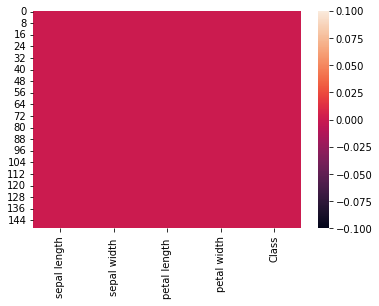

In [6]:
# No null values
sns.heatmap(df.isnull())

# converting the categorical value to numerical value

In [7]:
order_label={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

In [8]:
df['Class']=df['Class'].map(order_label)

In [9]:
df

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
# It is used to show how each column affect the dependent variable
correlation = df.corr()['Class']
correlation

sepal length     0.782561
sepal width     -0.419446
petal length     0.949043
petal width      0.956464
Class            1.000000
Name: Class, dtype: float64

In [11]:
# All are in cm so no need of scaling

# Train Test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.Class, test_size=0.2,random_state=16)

In [14]:
from sklearn.linear_model import LogisticRegression 

In [15]:
model=LogisticRegression()

In [16]:
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
# predicting the train dataset values
model.predict(X_train)

array([2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1,
       2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2,
       2, 1, 2, 0, 0, 2, 2, 1, 1, 2], dtype=int64)

In [18]:
# score of training dataset
model.score(X_train,y_train)

0.9833333333333333

In [19]:
# predicting the test dataset values
model.predict(X_test)

array([1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0,
       1, 2, 1, 1, 1, 2, 2, 0], dtype=int64)

In [20]:
# score of test dataset
model.score(X_test,y_test)

0.9

In [21]:
model.predict_proba(X_test)

array([[4.80825559e-03, 6.13162710e-01, 3.82029034e-01],
       [9.87719240e-01, 1.22807088e-02, 5.16833600e-08],
       [3.29162242e-03, 7.24418153e-01, 2.72290225e-01],
       [7.64652515e-04, 3.72438924e-01, 6.26796424e-01],
       [4.01000667e-03, 7.59432361e-01, 2.36557632e-01],
       [9.67788261e-01, 3.22115936e-02, 1.45151875e-07],
       [7.58977954e-03, 8.49437083e-01, 1.42973138e-01],
       [9.63281877e-01, 3.67179201e-02, 2.03221499e-07],
       [9.77958574e-01, 2.20413510e-02, 7.51089168e-08],
       [1.63167377e-02, 9.24392639e-01, 5.92906231e-02],
       [4.93982820e-02, 9.46722490e-01, 3.87922786e-03],
       [6.89249228e-05, 3.82545719e-02, 9.61676503e-01],
       [1.27637125e-04, 2.90710827e-01, 7.09161536e-01],
       [9.62734028e-01, 3.72658497e-02, 1.22689511e-07],
       [1.07201701e-04, 1.22620644e-01, 8.77272154e-01],
       [1.67208788e-02, 9.48738174e-01, 3.45409469e-02],
       [9.72911532e-01, 2.70883395e-02, 1.28718516e-07],
       [9.65724539e-01, 3.42750